In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV as gsCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [3]:
#read in data
dfmain = pd.read_csv('IDS_Dataset_Group_75.csv')
dfmain

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
2,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
3,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
4,x9859f,male,28,Dutch,Cricket,63,False,True,True,False,1,False,phd,A,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,x8998a,male,27,Dutch,Cricket,76,True,True,False,False,2,True,master,A,True
280,x3664a,male,28,Dutch,Tennis,68,True,False,False,True,3,False,master,A,True
281,x2659d,male,30,Dutch,Tennis,54,True,False,False,True,2,False,bachelor,A,False
282,x3164f,male,28,Dutch,Cricket,57,False,False,False,False,1,False,bachelor,A,False


In [4]:
#Describe the data
print(dfmain.describe())
print("=====================================================================================================")
print(dfmain.shape)


              age  ind-university_grade  ind-languages
count  284.000000            284.000000     284.000000
mean    26.471831             62.820423       1.306338
std      2.964319              5.593358       0.743282
min     21.000000             49.000000       0.000000
25%     24.000000             58.000000       1.000000
50%     27.000000             63.000000       1.000000
75%     28.000000             67.000000       2.000000
max     32.000000             76.000000       3.000000
(284, 15)


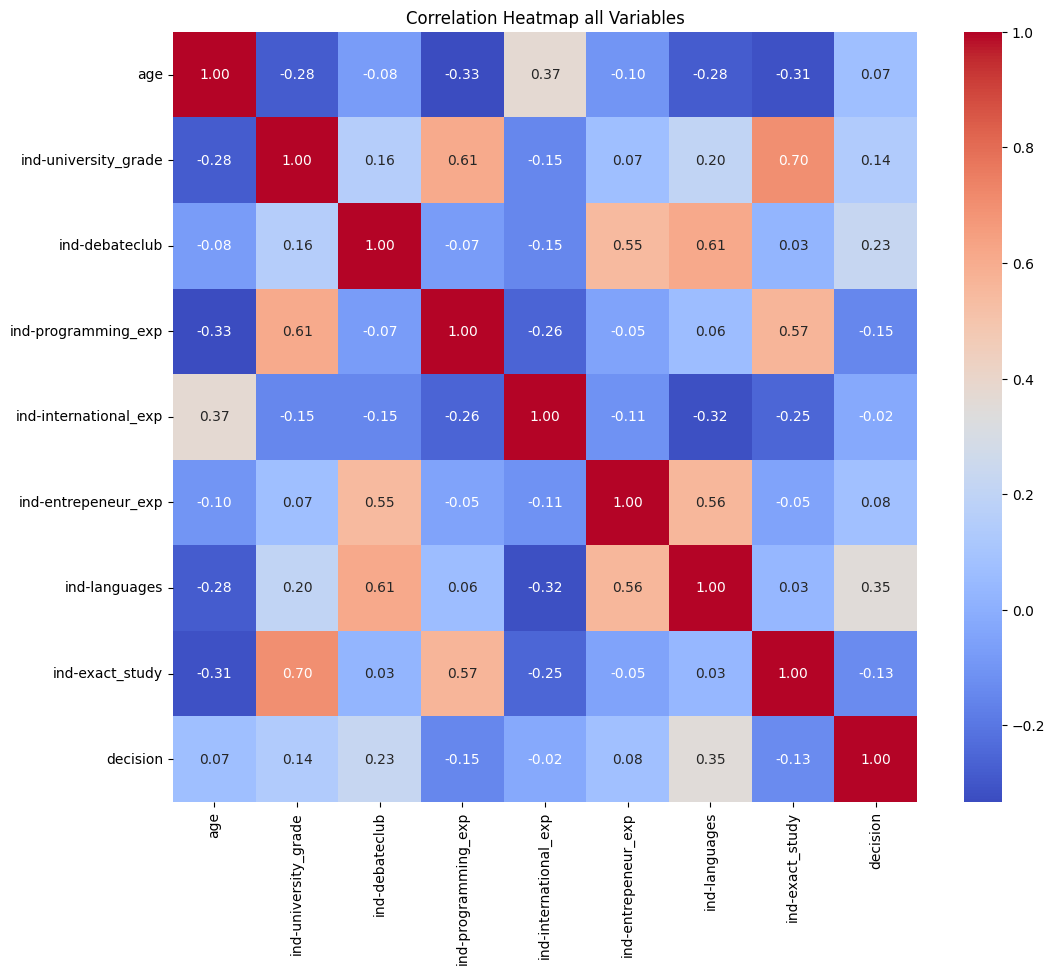

In [5]:
### Heatmap cross-correlation all numerical variables
# Convert boolean columns to int
bool_cols = dfmain.select_dtypes(include=[bool]).columns
dfmain[bool_cols] = dfmain[bool_cols].astype(int)

# Select numeric columns (now inc bool converted to int)
numeric_cols = dfmain.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap all Variables')
plt.show()

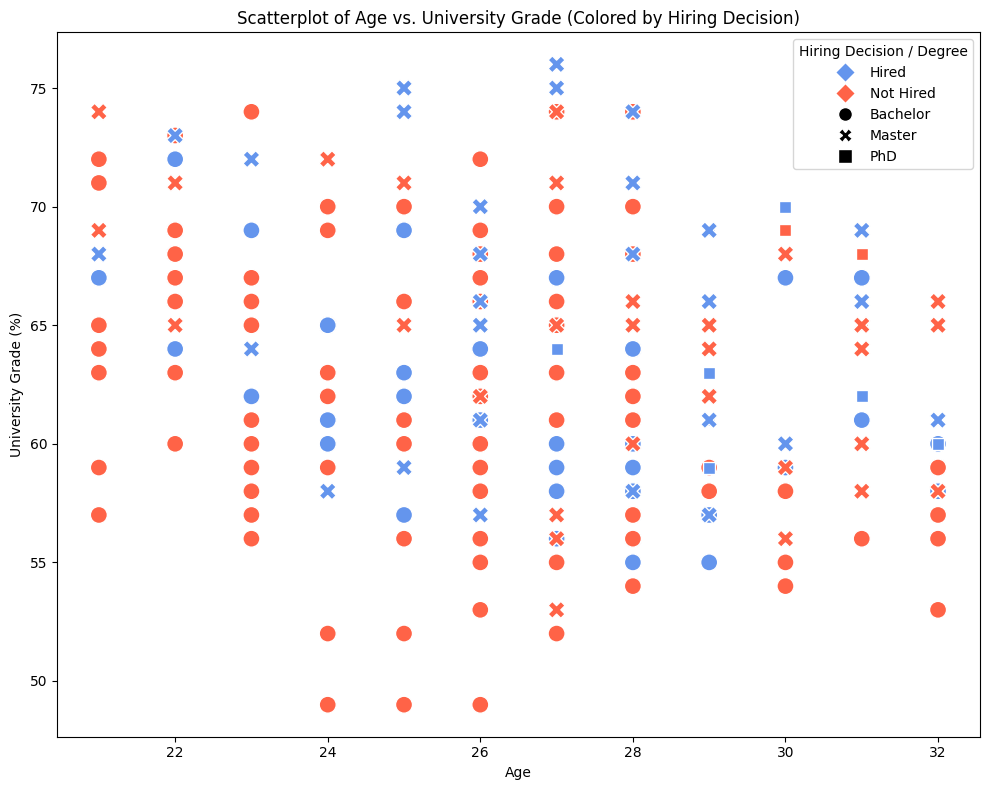

In [6]:
### Scatterplot Age vs Grade (Hiring decision + Gender)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='age', y='ind-university_grade', hue='decision', hue_order=[True, False], style='ind-degree',
                        palette={True: '#6495ED', False: '#FF6347'}, data=dfmain, legend=False, s=150)
plt.title('Scatterplot of Age vs. University Grade (Colored by Hiring Decision)')
plt.xlabel('Age')
plt.ylabel('University Grade (%)')

legend_labels = ['Hired', 'Not Hired', 'Bachelor', 'Master', 'PhD']
legend_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#6495ED', markersize=10)
legend_not_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#FF6347', markersize=10)
legend_bachelor = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize=10)
legend_master = plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10)
legend_phd = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)

plt.legend(handles=[legend_hired, legend_not_hired, legend_phd, legend_master, legend_bachelor],
        labels=legend_labels, title='Hiring Decision / Degree', bbox_to_anchor=(1, 1), loc='upper right')

plt.tight_layout()
plt.show()

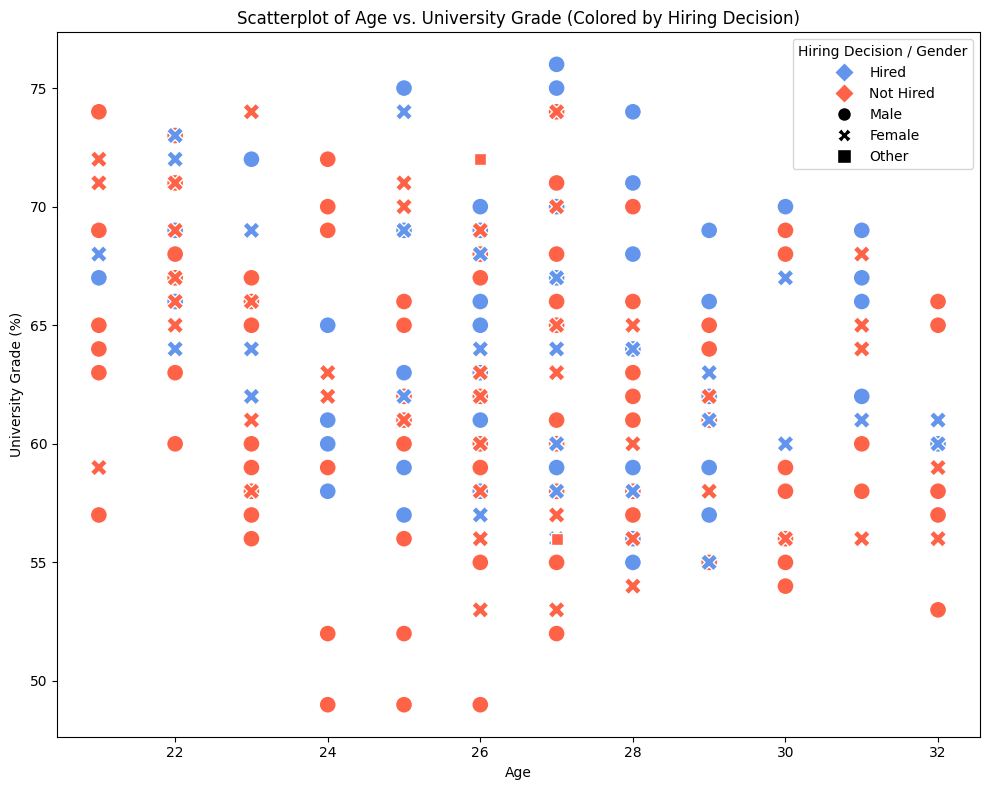

In [7]:
### Scatterplot Age vs Grade (Hiring decision + Degree)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='age', y='ind-university_grade', hue='decision', hue_order=[True, False], style='gender',
                          palette={True: '#6495ED', False: '#FF6347'}, data=dfmain, legend=False, s=150)
plt.title('Scatterplot of Age vs. University Grade (Colored by Hiring Decision)')
plt.xlabel('Age')
plt.ylabel('University Grade (%)')

# legend
legend_labels = ['Hired', 'Not Hired', 'Male', 'Female', 'Other']
legend_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#6495ED', markersize=10)
legend_not_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#FF6347', markersize=10)
legend_male = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)
legend_female = plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10)
legend_other = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize=10)


plt.legend(handles=[legend_hired, legend_not_hired, legend_male, legend_female, legend_other],
           labels=legend_labels, title='Hiring Decision / Gender', bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.show()

In [8]:
df = dfmain.copy()

###################### All four experiences ######################

df['all-at-once'] = np.where((df['ind-programming_exp'] == True) & (df['ind-entrepeneur_exp'] == True) & (df['ind-international_exp'] == True) & (df['ind-debateclub'] == True), True, False)

###################### Exactly three experiences ######################

df['prog-entrepeneur-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == False), True, False)
df['prog-entrepeneur-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == True), True, False)
df['prog-international-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)
df['entrepeneur-international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)

###################### Exactly two experiences ######################

df['programming-entrepeneur'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == False ), True, False)
df['programming-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['programming-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-international'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)
df['international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)

###################### No experience or only one experience ######################

df['no_experience'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_programming'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_entrepeneur'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False) , True, False)
df['only_international'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_debate'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)

In [9]:
#create an empty dataframe for the purpose of graphing specific experiences
df_exp = pd.DataFrame(columns=['experiences', 'acceptance_rate', 'num_of_students', 'num_of_accepted_students'])

#function to calculate acceptance rates for each experience
def experience_acceptance_rates(df_exp):

    listOfColumns = ['all-at-once', 'prog-entrepeneur-international', 'prog-entrepeneur-debate', 'prog-international-debate', 'entrepeneur-international-debate', 'programming-entrepeneur', 'programming-international', 'entrepeneur-international', 'entrepeneur-debate', 'programming-debate', 'international-debate', 'only_programming', 'only_entrepeneur', 'only_international', 'only_debate', 'no_experience']

    # new dataframe
    

    for i in listOfColumns:
        if len(np.where(df[i] == True)[0]) == 0:
            #append to dataframe
            df_exp = pd.concat([df_exp, pd.Series({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}).to_frame().T], ignore_index=True)
        else:
            #append to dataframe
            df_exp = pd.concat([df_exp, pd.Series({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}).to_frame().T], ignore_index=True)

    return df_exp

df_exp = experience_acceptance_rates(df_exp)

#sort by acceptance rate
df_exp = df_exp.sort_values(by=['num_of_students'], ascending=False)
# df_exp.head()

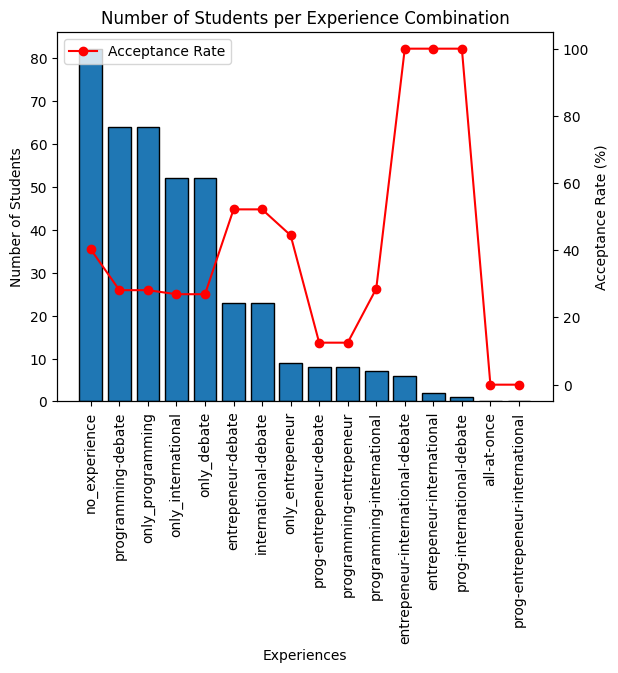

In [10]:
#plot acceptance rates for different experiences
plt.title("Number of Students per Experience Combination")
plt.xlabel("Experiences")
plt.ylabel("Number of Students")
plt.bar(df_exp['experiences'], df_exp['num_of_students'], edgecolor='black')
plt.xticks(rotation=90)

ax2 = plt.twinx()
ax2.plot(df_exp['acceptance_rate'].values, color='r', marker='o', label='Acceptance Rate')
ax2.set_ylabel('Acceptance Rate (%)')
ax2.legend(loc='upper left')

plt.show()

In [11]:
#Create a new dataframe for the purpose of graphing ages and acceptance rates
employees = df.copy()
employees = employees[employees['decision'] == True]
# employees.head()

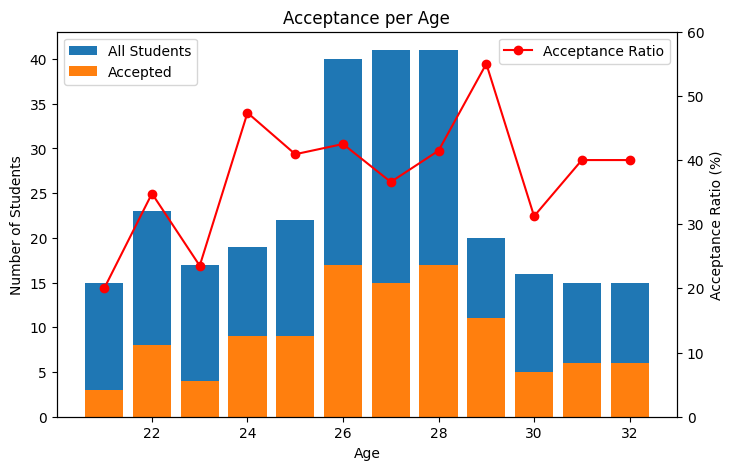

In [12]:
#count the number of (hired) students for each age
df_age_counts = df['age'].value_counts()
employees_age_counts = employees['age'].value_counts()

#calculate ratio of accepted students per age
acceptance_ratio = employees_age_counts / df_age_counts * 100

#plot acceptance rates per age
plt.figure(figsize=(8, 5))
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.bar(employees['age'].value_counts().index, employees['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Acceptance per Age')
plt.legend(['All Students', 'Accepted'], loc='upper left')

ax2 = plt.twinx()
ax2.plot(acceptance_ratio.index, acceptance_ratio.values, color='r', marker='o', label='Acceptance Ratio')
ax2.set_ylabel('Acceptance Ratio (%)')
ax2.legend(loc='upper right')
ax2.set_ylim([0, 60])

plt.show()

**Important note about graph above**

There is something important to mention here. The population is nearly split into three groups here. Firstly, the ages 26 - 28 are clearly the ones applying the most for this job. Most acceptances also happen in these three ages. That being said, ages 24 and 29 are the most likely to be accepted by far. This is interesting becasue the number of applicants younger than 26 is usually around the same for each age. On the other end of that spectrum, ages 21 and 23 are by far the least likely to be accepted.

I believe that this group of applicants at age 29 should be studied further.

In [13]:
#remove all rows where the gender value is 'other'
dfgenders = dfmain[dfmain['gender'] != 'other'].copy()

Text(0.5, 0, 'gender')

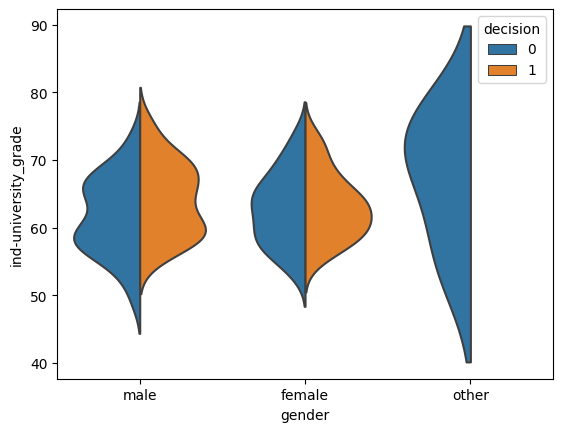

In [14]:
dfgenders["all"] = ""
ax = sns.violinplot(x = "gender", y="ind-university_grade", hue = 'decision', data = dfmain, split=True, inner=None)
ax.set_xlabel("gender")

In [15]:
#make a copy of the dataframe and count how many rows decision==True for each unique grade
dfgrades = dfmain.copy()
dfgrades = dfgrades[dfgrades['decision'] == True]

#get the counts of instances for each unique grade in total
dfcounts1 = pd.DataFrame()
dfcounts2 = pd.DataFrame()
dfcounts1[['allgrades', 'all']] = df['ind-university_grade'].value_counts().to_frame().reset_index()
dfcounts2[['acceptedgrades', 'accepted']] = dfgrades['ind-university_grade'].value_counts().to_frame().reset_index()

#sort the values of both allgrades and acceptedgrades in ascending order
dfcounts1 = dfcounts1.sort_values(by=['allgrades'])
dfcounts2 = dfcounts2.sort_values(by=['acceptedgrades'])

#reset the indexes to the current order
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame(0, columns=['accepted'], index=range(4))], ignore_index=True)
dfcounts2 = dfcounts2.shift(4)

#merge the datasets on index
dfcounts1.reset_index(drop=True, inplace=True)
dfcounts = pd.concat([dfcounts1, dfcounts2], axis=1)

#create a new column with the ratio of accepted/total
dfcounts['ratio'] = dfcounts['accepted']/dfcounts['all']

#replace all NaN values with 0
dfcounts = dfcounts.fillna(0)



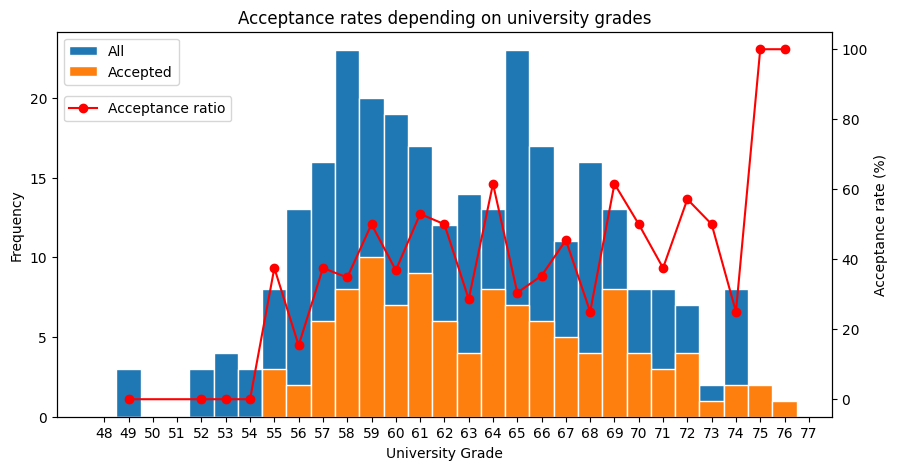

In [16]:
#plot the histogram
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bin = np.arange(48, 78, 1)

ax1.hist(dfmain['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.hist(dfgrades['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.set_ylabel("Frequency")
ax1.legend(["All", "Accepted"], loc='upper left', bbox_to_anchor=(0.0, 1.0))

#plot a line for the ratio
ax2.plot(dfcounts['allgrades'], dfcounts['ratio']*100, 'o-', color='red')
ax2.legend(["Acceptance ratio"], loc='center left', bbox_to_anchor=(0.0, 0.8))
ax2.set_ylabel("Acceptance rate (%)")

plt.xticks(np.arange(48, 78, 1))
ax1.set_xlabel("University Grade")
plt.title("Acceptance rates depending on university grades")

plt.show()

In [17]:
#create a subset of the data to be used for a decision tree
dftree = dfmain.copy()
dftree.drop(['Id', 'gender', 'nationality', 'sport', 'ind-debateclub', 'ind-programming_exp', 'ind-languages', 'ind-degree', 'company', 'ind-exact_study'], axis=1, inplace=True)
# dftree.drop(['age'], axis=1, inplace=True)
# dftree.drop(['ind-university_grade'], axis=1, inplace=True)
# dftree.drop(['ind-entrepeneur_exp'], axis=1, inplace=True)
# dftree.drop(['ind-international_exp'], axis=1, inplace=True)

#encode non useable data to useful form
# dftree = pd.get_dummies(dftree, columns=['nationality'], drop_first=True)
# labelencoder = LabelEncoder()
# dftree['ind-degree'] = labelencoder.fit_transform(dftree['ind-degree'])

#separate the data into features and classes
dftreefeatures = dftree.copy()
dftreeclasses = dftree['decision']
dftreefeatures.drop(['decision'], axis=1, inplace=True)

In [18]:
#split the set into training, validation and testing sets
X_train, X_test, y_train, y_test = tts(dftreefeatures, dftreeclasses, test_size=0.3, stratify= dftreeclasses, random_state=124365)
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.2, stratify=y_train, random_state=8324)

#turn the data into lists (for usability)
y_train = y_train.tolist()
y_val = y_val.tolist()
y_test = y_test.tolist()

In [19]:
#Iteratively find the best hyperparameters for the decision tree (at least according to sklearn)
def findhp(n):
    for _ in range(n):
        param_grid = {'criterion': ['gini', 'entropy'],
                    'max_depth': [None, 1, 2, 3, 4, 5, 10, 20]}
        grid = gsCV(DecisionTreeClassifier(), param_grid, cv=5)
        grid.fit(X_train, y_train)

        print("Best hyperparameters:", grid.best_params_)

findhp(5)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}


In [20]:
#Evaluate the results, calculate accuracy, precision and recall for both hired and not hired students
def evalresults(actual, predicted):
    #convert predicted into a normal list
    predicted = predicted.tolist()

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    #count the number of true's in the actual set
    true = actual.count(True)

    #calculate the precision and recall for each class
    for i in range(len(actual)):
        if predicted[i] == True and actual[i] == True:
            TP += 1
        elif predicted[i] == False and actual[i] == False:
            TN += 1
        elif predicted[i] == True and actual[i] == False:
            FP += 1
        elif predicted[i] == False and actual[i] == True:
            FN += 1
        
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    try:
        precision = TP / (TP + FP)
    except ZeroDivisionError:
        precision = 0
    try:
        recall = TP / (TP + FN)
    except ZeroDivisionError:
        recall = 0
    try:
        F1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        F1 = 0

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", F1)

In [21]:
#initialize the tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
#predict the classes for the validation set
y_pred = clf.predict(X_val)

#evaluate the results
evalresults(y_val, y_pred)

Accuracy: 0.75
Precision: 0.75
Recall: 0.5625
F1: 0.6428571428571429


Validation results with different inputs:
- only age: accuracy of maximum 0.575 (best architecture uses gini and max depth = 3).
            large bias present towards False.
- only university grade: max accuracy of 0.65 (gini and depth = 2). There is still a  bias towards False, but the recall of True values is now much larger.
- only entrepeneur experience: This is a boolean, and thus any max depth higher than 1 will not make a difference. The model in this configuration always guesses false, getting an accuracy of about 0.6
- only international experience: The same is true as for only entrepeneur experience.

- age and grade: best accuracy is 0.675. What is notable about this model that along with the higher accuracy, it also has a much better recall for the True state of the decision column. The model is overall much less biased.
- entrepeneur and international experience: The model now reaches the highest accuracy yet, namely 0.625. It seems to be very good at guessing Trues correctly, but the recall for this value is very low. On the inverse, the recall of False is 1. This means that the model only guesses True if it is absolutely certain.

- age, grade and entrepeneur: best accuracy is 0.675, using entropy and a max depth of 4. What is notable about this model that along with the higher accuracy, it also has a much better recall for the True state of the decision column. The model is overall much less biased.
- age, grade and international: very similar results to the previous model.
- age, entrepeneur and international: accuracy is now back to 0.575, with a larger bias again towards False.
- grade, entrepeneur and international: with an accuracy of about 0.65, this model in in between the previously listed model and the other combinations of 3 features in all evaluation factors.

- all 4: This is the best model found, with an accuracy of 0.75, a True recall of 0.5625 and False recall of 0.875. The model is much less biased than the previous models. The architecture for this model is found to be using entropy, and a max depth of 5.

[Text(0.4230769230769231, 0.9166666666666666, 'x[0] <= 21.5\nentropy = 0.962\nsamples = 158\nvalue = [97, 61]'),
 Text(0.34615384615384615, 0.75, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5, 0.75, 'x[1] <= 54.5\nentropy = 0.973\nsamples = 151\nvalue = [90, 61]'),
 Text(0.4230769230769231, 0.5833333333333334, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5769230769230769, 0.5833333333333334, 'x[1] <= 68.5\nentropy = 0.982\nsamples = 145\nvalue = [84, 61]'),
 Text(0.3076923076923077, 0.4166666666666667, 'x[0] <= 23.5\nentropy = 0.957\nsamples = 119\nvalue = [74, 45]'),
 Text(0.15384615384615385, 0.25, 'x[1] <= 61.5\nentropy = 0.742\nsamples = 19\nvalue = [15, 4]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.23076923076923078, 0.08333333333333333, 'entropy = 0.863\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.25, 'x[3] <= 0.5\nentropy = 0.977\nsamples = 100\nvalue = [59, 41]'),
 Text(0.38461

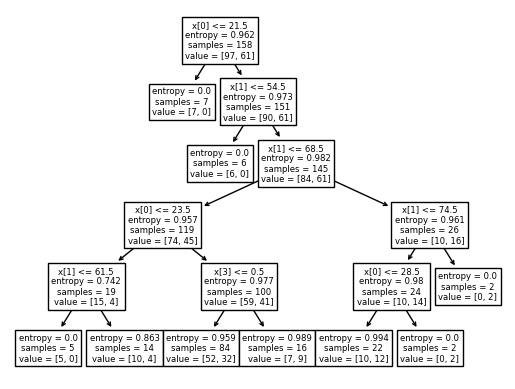

In [23]:
#print the tree
tree.plot_tree(clf)

In [24]:
#Test the tree on the test set to view actual performance
y_pred = clf.predict(X_test)
evalresults(y_test, y_pred)

Accuracy: 0.5930232558139535
Precision: 0.45454545454545453
Recall: 0.30303030303030304
F1: 0.36363636363636365


In [25]:
#test it on the full set (for plotting purposes)
y_pred = clf.predict(dftreefeatures)
evalresults(dftreeclasses.tolist(), y_pred) 

Accuracy: 0.6549295774647887
Precision: 0.5789473684210527
Recall: 0.4
F1: 0.4731182795698925


In [26]:
dfpred = dfmain.copy()
dfpred['decision'] = y_pred

Text(0.5, 1.0, 'Entrepeuneur and International Experience')

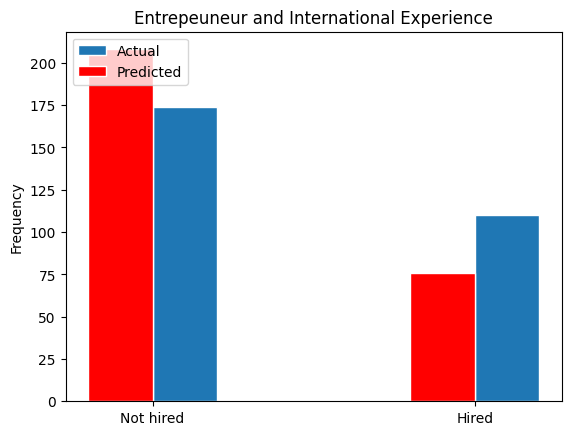

In [27]:
#make histogram showing number of trues and falses in both dfmain and dfpred
dfplotpred = dfpred.copy()
dfplotmain = dfmain.copy()
#in the decision column, change 1 to True and 0 to False
dfplotpred['decision'] = dfplotpred['decision'].replace(1, True)
dfplotpred['decision'] = dfplotpred['decision'].replace(0, False)
dfplotmain['decision'] = dfplotmain['decision'].replace(1, True)
dfplotmain['decision'] = dfplotmain['decision'].replace(0, False)

#plot the bargraphs
plt.bar(dfplotmain['decision'].value_counts().index + 0.1, dfplotmain['decision'].value_counts().values, edgecolor='white', width=0.2)
plt.bar(dfplotpred['decision'].value_counts().index - 0.1, dfplotpred['decision'].value_counts().values, edgecolor='white', width=0.2, color='red')
plt.ylabel("Frequency")
plt.legend(["Actual", "Predicted"], loc='upper left', bbox_to_anchor=(0.0, 1.0))
plt.xticks([0, 1], ['Not hired', 'Hired'])
plt.title("Entrepeuneur and International Experience")





Comparative plots

In [28]:
df = dfpred.copy()

###################### All four experiences ######################

df['all-at-once'] = np.where((df['ind-programming_exp'] == True) & (df['ind-entrepeneur_exp'] == True) & (df['ind-international_exp'] == True) & (df['ind-debateclub'] == True), True, False)

###################### Exactly three experiences ######################

df['prog-entrepeneur-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == False), True, False)
df['prog-entrepeneur-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == True), True, False)
df['prog-international-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)
df['entrepeneur-international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)

###################### Exactly two experiences ######################

df['programming-entrepeneur'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == False ), True, False)
df['programming-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['programming-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-international'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)
df['international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)

###################### No experience or only one experience ######################

df['no_experience'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_programming'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_entrepeneur'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False) , True, False)
df['only_international'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_debate'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)

In [29]:
#create an empty dataframe for the purpose of graphing specific experiences
df_exp_model = pd.DataFrame(columns=['experiences', 'acceptance_rate', 'num_of_students', 'num_of_accepted_students'])

#function to calculate acceptance rates for each experience
def experience_acceptance_rates(df_exp_model):

    listOfColumns = ['all-at-once', 'prog-entrepeneur-international', 'prog-entrepeneur-debate', 'prog-international-debate', 'entrepeneur-international-debate', 'programming-entrepeneur', 'programming-international', 'entrepeneur-international', 'entrepeneur-debate', 'programming-debate', 'international-debate', 'only_programming', 'only_entrepeneur', 'only_international', 'only_debate', 'no_experience']

    # new dataframe
    

    for i in listOfColumns:
        if len(np.where(df[i] == True)[0]) == 0:
            #append to dataframe
            df_exp_model = pd.concat([df_exp_model, pd.Series({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}).to_frame().T], ignore_index=True)
        else:
            #append to dataframe
            df_exp_model = pd.concat([df_exp_model, pd.Series({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}).to_frame().T], ignore_index=True)

    return df_exp_model

df_exp_model = experience_acceptance_rates(df_exp_model)

#sort by acceptance rate
df_exp_model = df_exp_model.sort_values(by=['num_of_students'], ascending=False)
# df_exp.head()

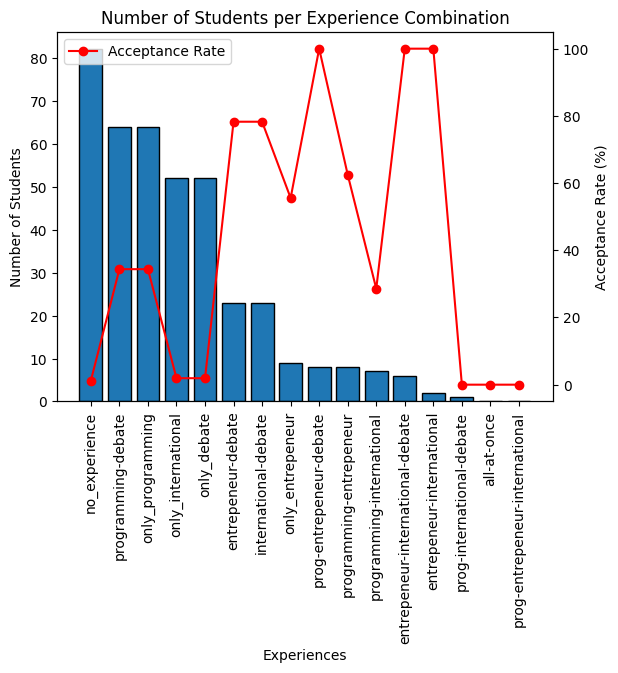

In [30]:
#plot acceptance rates for different experiences
plt.title("Number of Students per Experience Combination")
plt.xlabel("Experiences")
plt.ylabel("Number of Students")
plt.bar(df_exp_model['experiences'], df_exp_model['num_of_students'], edgecolor='black')
plt.xticks(rotation=90)

ax2 = plt.twinx()
ax2.plot(df_exp_model['acceptance_rate'].values, color='r', marker='o', label='Acceptance Rate')
ax2.set_ylabel('Acceptance Rate (%)')
ax2.legend(loc='upper left')


plt.show()

In [31]:
# add a column to add numbers 1 - 15 in df_exp_model
df_exp_model['number'] = np.arange(0, len(df_exp_model), 1)
df_exp_model.head()


,experiences,acceptance_rate,num_of_students,num_of_accepted_students,number
15,no_experience,1.219512,82,5,0
9,programming-debate,34.375,64,5,1
11,only_programming,34.375,64,5,2
13,only_international,1.923077,52,5,3
14,only_debate,1.923077,52,5,4


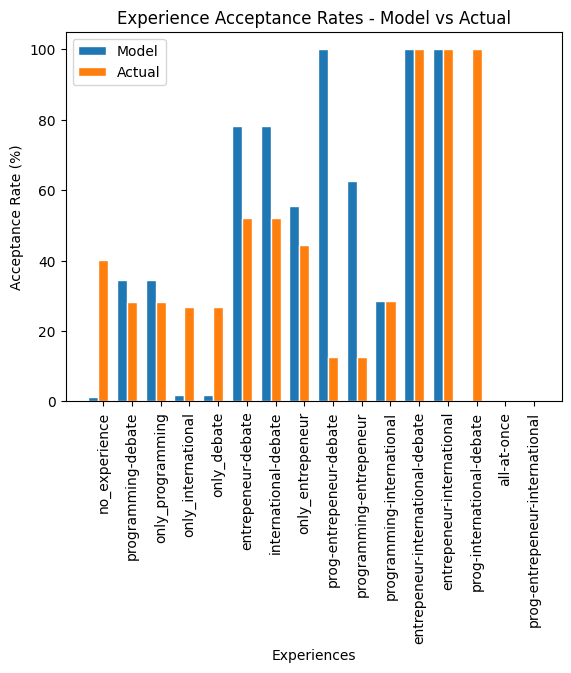

In [32]:
x = np.arange(len(df_exp_model['experiences']))

bar_width = 0.35
df_exp['number'] = np.arange(0, len(df_exp), 1)
df_exp_model['number'] = np.arange(0, len(df_exp_model), 1)
plt.title("Experience Acceptance Rates - Model vs Actual")
plt.xlabel("Experiences")
plt.ylabel('Acceptance Rate (%)')
plt.bar(df_exp_model['number'] - bar_width/2, df_exp_model['acceptance_rate'].values, width=bar_width, edgecolor='white', label="Model")
plt.bar(df_exp['number'] + bar_width/2, df_exp['acceptance_rate'].values, width=bar_width, edgecolor='white', label="Actual")
plt.legend()
plt.xticks(x + bar_width / 2, df_exp['experiences'], rotation=90)
plt.show()

In [33]:
#Create a new dataframe for the purpose of graphing ages and acceptance rates
employees = df.copy()
employees = employees[employees['decision'] == True]
# employees.head()

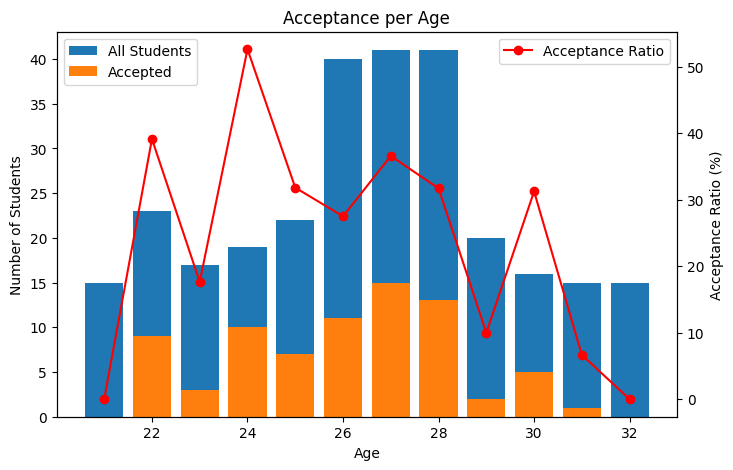

In [34]:
#count the number of (hired) students for each age
df_age_counts = df['age'].value_counts()
employees_age_counts = employees['age'].value_counts()

#calculate ratio of accepted students per age

# if an instance of df_age_counts is not in employees_age_counts, add it to the dataframe with a value of 0
for i in df_age_counts.index:
    if i not in employees_age_counts.index:
        employees_age_counts[i] = 0

acceptance_ratio_model = employees_age_counts / df_age_counts * 100

#plot acceptance rates per age
plt.figure(figsize=(8, 5))
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.bar(employees['age'].value_counts().index, employees['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Acceptance per Age')
plt.legend(['All Students', 'Accepted'], loc='upper left')

ax2 = plt.twinx()
ax2.plot(acceptance_ratio_model.index, acceptance_ratio_model.values, color='r', marker='o', label='Acceptance Ratio')
ax2.set_ylabel('Acceptance Ratio (%)')
ax2.legend(loc='upper right')

plt.show()

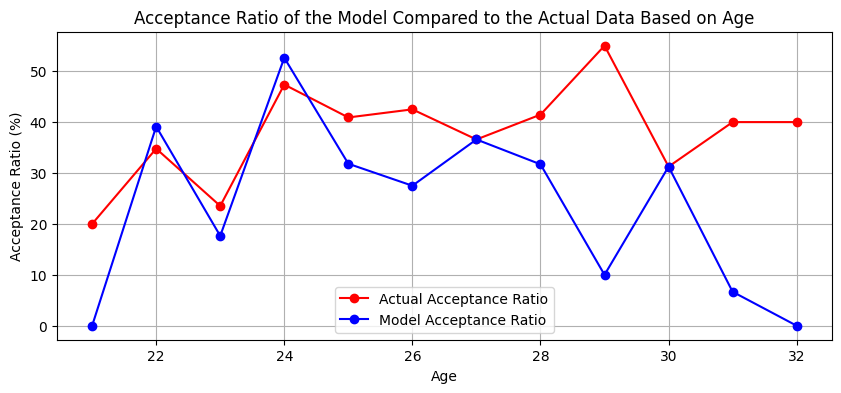

In [35]:
# plot the acceptance ratio of the model compared to the actual data

plt.figure(figsize=(10, 4))
plt.title('Acceptance Ratio of the Model Compared to the Actual Data Based on Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Ratio (%)')
plt.plot(acceptance_ratio.index, acceptance_ratio.values, color='r', marker='o', label='Actual Acceptance Ratio')
plt.plot(acceptance_ratio_model.index, acceptance_ratio_model.values, color='b', marker='o', label='Model Acceptance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#remove all rows where the gender value is 'other'
dfgenders = dfpred[dfpred['gender'] != 'other'].copy()

(40.0, 90.0)

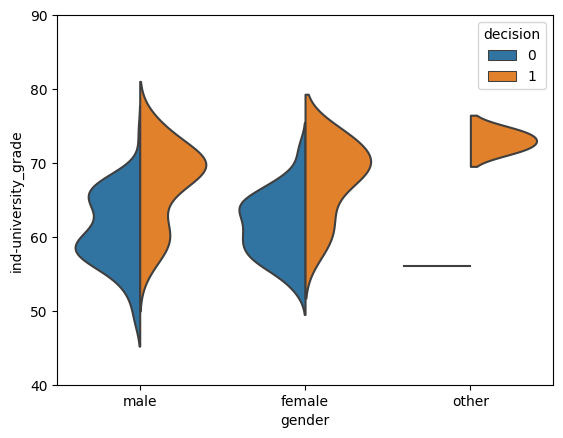

In [37]:
'''NOTE THAT I DO NOT YET FULLY KNOW WHICH VIOLINPLOTS WE WANT EXACTLY'''

#Plot a violinplot
dfgenders["all"] = ""
ax = sns.violinplot(x = "gender", y="ind-university_grade", hue = 'decision', data = df, split=True, inner=None)
ax.set_xlabel("gender")
plt.ylim(40, 90)

In [38]:
#make a copy of the dataframe and count how many rows decision==True for each unique grade
dfgrades = dfpred.copy()
dfgrades = dfgrades[dfgrades['decision'] == 1]

#get the counts of instances for each unique grade in total
dfcounts1 = pd.DataFrame()
dfcounts2 = pd.DataFrame()
dfcounts1[['allgrades', 'all']] = dfpred['ind-university_grade'].value_counts().to_frame().reset_index()
dfcounts2[['acceptedgrades', 'accepted']] = dfgrades['ind-university_grade'].value_counts().to_frame().reset_index()

#add values that are not in dfcounts 2 but are in dfcounts 1
newrow1 = {'acceptedgrades': 56, 'accepted': 0}
newrow2 = {'acceptedgrades': 64, 'accepted': 0}
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame([newrow1])], ignore_index=True)
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame([newrow2])], ignore_index=True)

#sort the values of both allgrades and acceptedgrades in ascending order
dfcounts1 = dfcounts1.sort_values(by=['allgrades'])
dfcounts2 = dfcounts2.sort_values(by=['acceptedgrades'])

#reset the indexes to the current order
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame(0, columns=['accepted'], index=range(4))], ignore_index=True)
dfcounts2 = dfcounts2.shift(4)


#merge the datasets on index
dfcounts1.reset_index(drop=True, inplace=True)
dfcounts_model = pd.concat([dfcounts1, dfcounts2], axis=1)

#create a new column with the ratio of accepted/total
dfcounts_model['ratio'] = dfcounts_model['accepted']/dfcounts_model['all']

#replace all NaN values with 0
dfcounts_model = dfcounts_model.fillna(0)

dfcounts_model


,allgrades,all,acceptedgrades,accepted,ratio
0,49,3,0.0,0.0,0.000000
1,52,3,0.0,0.0,0.000000
2,53,4,0.0,0.0,0.000000
3,54,3,0.0,0.0,0.000000
4,55,8,55.0,1.0,0.125000
5,56,13,56.0,0.0,0.000000
6,57,16,57.0,2.0,0.125000
7,58,23,58.0,3.0,0.130435
8,59,20,59.0,2.0,0.100000
9,60,19,60.0,4.0,0.210526


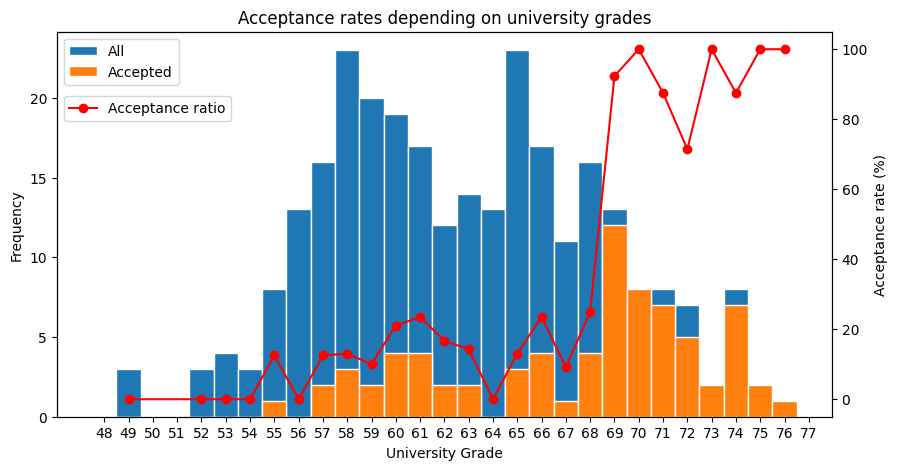

In [39]:
#plot the histogram
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bin = np.arange(48, 78, 1)

ax1.hist(dfpred['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.hist(dfgrades['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.set_ylabel("Frequency")
ax1.legend(["All", "Accepted"], loc='upper left', bbox_to_anchor=(0.0, 1.0))

#plot a line for the ratio
ax2.plot(dfcounts_model['allgrades'], dfcounts_model['ratio']*100, 'o-', color='red')
ax2.legend(["Acceptance ratio"], loc='center left', bbox_to_anchor=(0.0, 0.8))
ax2.set_ylabel("Acceptance rate (%)")

plt.xticks(np.arange(48, 78, 1))
ax1.set_xlabel("University Grade")
plt.title("Acceptance rates depending on university grades")

plt.show()

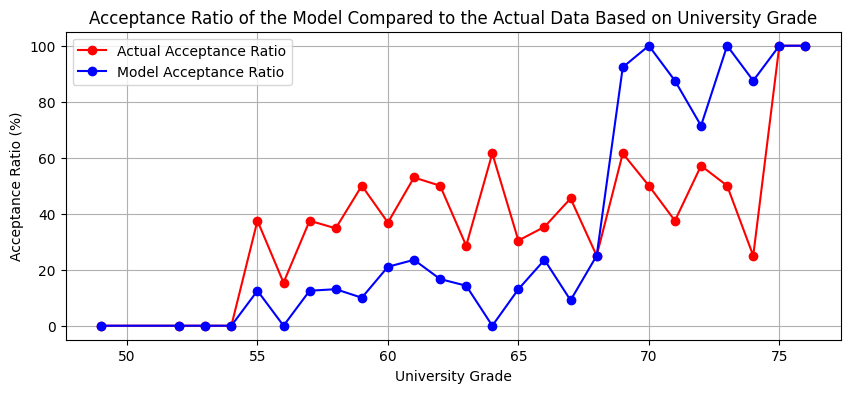

In [40]:
# plot the acceptance ratio of the model compared to the actual data

plt.figure(figsize=(10, 4))
plt.title('Acceptance Ratio of the Model Compared to the Actual Data Based on University Grade')
plt.xlabel('University Grade')
plt.ylabel('Acceptance Ratio (%)')
plt.plot(dfcounts['allgrades'], dfcounts['ratio']*100, color='r', marker='o', label='Actual Acceptance Ratio')
plt.plot(dfcounts_model['allgrades'], dfcounts_model['ratio']*100, color='b', marker='o', label='Model Acceptance Ratio')
plt.plot()
plt.grid()
plt.legend()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

**Why Logistic Regression is a bad choice for this problem**

The first thing to note is that the accuracy of the logistic regression model is much lower than the accuracy of the decision tree. This is because the logistic regression model is not able to capture the non-linearities of the data. The decision tree is able to do this, and thus is able to make better predictions.

Trying with all numerical data avilable in the dataset (age, grade, and languages) the accuracy and F1 score becomes much better (better being more than 0), but still not as good as the decision tree. This means that there are simply no linear relations between the features and the targets.

In [42]:
dflogregnumerical = dfmain.copy()
dflogregnumerical.drop(['Id', 'gender', 'nationality', 'sport', 'ind-debateclub', 'ind-programming_exp', 'ind-degree', 'company', 'ind-exact_study'], axis=1, inplace=True)
dflogregnumerical.drop(['ind-entrepeneur_exp'], axis=1, inplace=True)
dflogregnumerical.drop(['ind-international_exp'], axis=1, inplace=True)

dflogregnumericalfeatures = dflogregnumerical.copy()
dflogregnumericalclasses = dflogregnumerical['decision']
dflogregnumericalfeatures.drop(['decision'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = tts(dflogregnumericalfeatures, dflogregnumericalclasses, test_size=0.3, stratify= dflogregnumericalclasses, random_state=112453)
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.2, stratify=y_train, random_state=1234)

y_train = y_train.tolist()
y_val = y_val.tolist()
y_test = y_test.tolist()

###____New Cell____###

def findhplr(n):
    for _ in range(n):
        param_grid = {'max_iter': [20000, 30000, 40000],
                      'penalty': ['l2', 'l1'],
                      'solver': ['liblinear', 'saga']}
        grid = gsCV(LogisticRegression(), param_grid, cv=5)
        grid.fit(X_train, y_train)

        print("Best hyperparameters:", grid.best_params_)

findhplr(5)

###____New Cell____###

logisticRegr = LogisticRegression(max_iter=20000, penalty='l2', solver='liblinear')
logisticRegr.fit(X_train, y_train)

###____New Cell____###

val_pred = logisticRegr.predict(X_val)
evalresults(y_val, val_pred)

###____New Cell____###

y_pred = logisticRegr.predict(X_test)
evalresults(y_test, y_pred)

Best hyperparameters: {'max_iter': 20000, 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters: {'max_iter': 20000, 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters: {'max_iter': 20000, 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters: {'max_iter': 20000, 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters: {'max_iter': 20000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.625
Precision: 0.5294117647058824
Recall: 0.5625
F1: 0.5454545454545455
Accuracy: 0.627906976744186
Precision: 0.5142857142857142
Recall: 0.5454545454545454
F1: 0.5294117647058822


In [44]:
pd.DataFrame(zip(X_test.columns, logisticRegr.coef_[0]))

,0,1
0,age,0.032424
1,ind-university_grade,-0.032762
2,ind-languages,1.220666


In [45]:
logisticRegr.intercept_

array([-0.81667437])

In [46]:
y_pred = logisticRegr.predict(dflogregnumericalfeatures)

In [47]:
dfpred = dfmain.copy()
dfpred['decision_pred'] = y_pred

In [48]:
#make a copy of the dataframe and count how many rows decision==True for each unique grade
dfgrades = dfpred.copy()
dfgrades = dfgrades[dfgrades['decision'] == 1]

#get the counts of instances for each unique grade in total
dfcounts1 = pd.DataFrame()
dfcounts2 = pd.DataFrame()
dfcounts1[['allgrades', 'all']] = dfpred['ind-university_grade'].value_counts().to_frame().reset_index()
dfcounts2[['acceptedgrades', 'accepted']] = dfgrades['ind-university_grade'].value_counts().to_frame().reset_index()

#add values that are not in dfcounts 2 but are in dfcounts 1
newrow1 = {'acceptedgrades': 56, 'accepted': 0}
newrow2 = {'acceptedgrades': 64, 'accepted': 0}
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame([newrow1])], ignore_index=True)
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame([newrow2])], ignore_index=True)

#sort the values of both allgrades and acceptedgrades in ascending order
dfcounts1 = dfcounts1.sort_values(by=['allgrades'])
dfcounts2 = dfcounts2.sort_values(by=['acceptedgrades'])

#reset the indexes to the current order
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame(0, columns=['accepted'], index=range(4))], ignore_index=True)
dfcounts2 = dfcounts2.shift(4)


#merge the datasets on index
dfcounts1.reset_index(drop=True, inplace=True)
dfcounts_model = pd.concat([dfcounts1, dfcounts2], axis=1)

#create a new column with the ratio of accepted/total

dfcounts_model['ratio'] = dfcounts_model['accepted']/dfcounts_model['all']

#replace all NaN values with 0
dfcounts_model = dfcounts_model.fillna(0)
dfcounts_model = dfcounts_model.drop([26, 27])


dfcounts_model

,allgrades,all,acceptedgrades,accepted,ratio
0,49.0,3.0,0.0,0.0,0.000000
1,52.0,3.0,0.0,0.0,0.000000
2,53.0,4.0,0.0,0.0,0.000000
3,54.0,3.0,0.0,0.0,0.000000
4,55.0,8.0,55.0,3.0,0.375000
5,56.0,13.0,56.0,2.0,0.153846
6,57.0,16.0,56.0,0.0,0.000000
7,58.0,23.0,57.0,6.0,0.260870
8,59.0,20.0,58.0,8.0,0.400000
9,60.0,19.0,59.0,10.0,0.526316


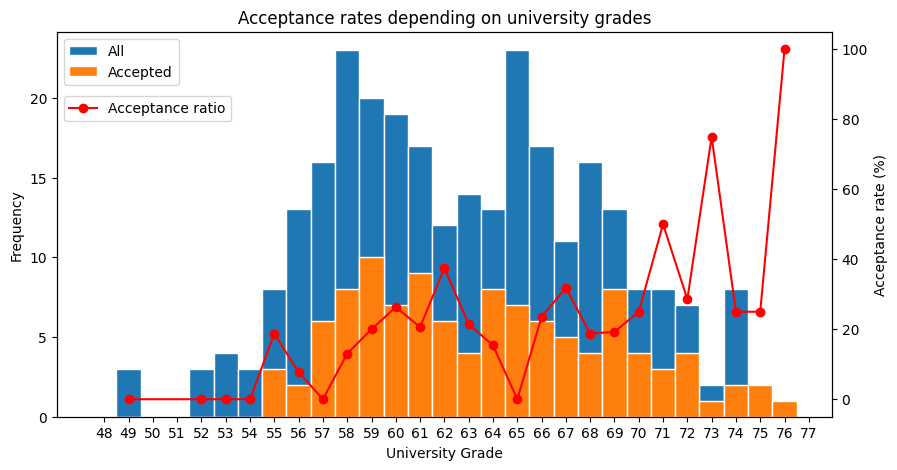

In [49]:
#plot the histogram
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bin = np.arange(48, 78, 1)

ax1.hist(dfpred['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.hist(dfgrades['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.set_ylabel("Frequency")
ax1.legend(["All", "Accepted"], loc='upper left', bbox_to_anchor=(0.0, 1.0))

#plot a line for the ratio
ax2.plot(dfcounts_model['allgrades'], dfcounts_model['ratio']*50, 'o-', color='red')
ax2.legend(["Acceptance ratio"], loc='center left', bbox_to_anchor=(0.0, 0.8))
ax2.set_ylabel("Acceptance rate (%)")

plt.xticks(np.arange(48, 78, 1))
ax1.set_xlabel("University Grade")
plt.title("Acceptance rates depending on university grades")

plt.show()

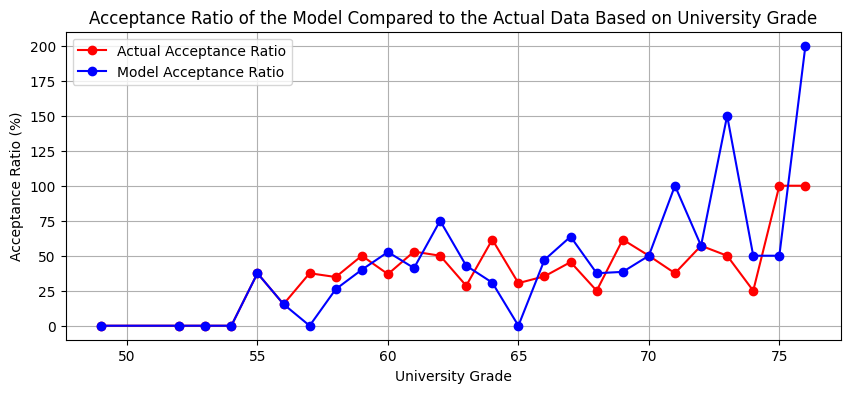

In [50]:
# plot the acceptance ratio of the model compared to the actual data

plt.figure(figsize=(10, 4))
plt.title('Acceptance Ratio of the Model Compared to the Actual Data Based on University Grade')
plt.xlabel('University Grade')
plt.ylabel('Acceptance Ratio (%)')
plt.plot(dfcounts['allgrades'], dfcounts['ratio']*100, color='r', marker='o', label='Actual Acceptance Ratio')
plt.plot(dfcounts_model['allgrades'], dfcounts_model['ratio']*100, color='b', marker='o', label='Model Acceptance Ratio')
plt.plot()
plt.grid()
plt.legend()

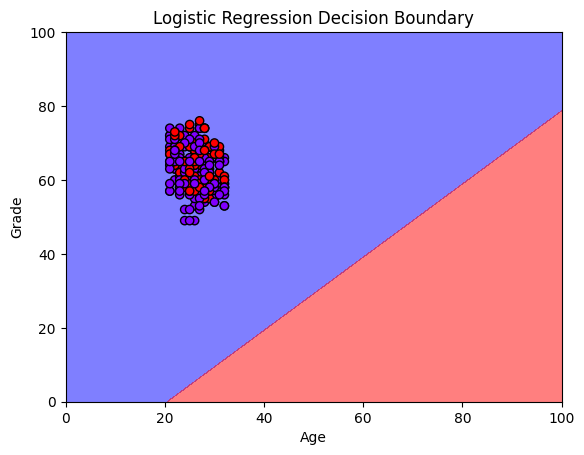

In [52]:
def logistic_function(x, y):
    intercept = -0.66391074
    coef_age = 0.032424
    coef_grade = -0.032762
    z = intercept + coef_age * x + coef_grade * y
    return 1 / (1 + np.exp(-z))

x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)

Z = logistic_function(X, Y)

plt.contourf(X, Y, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Grade')
plt.scatter(dflogregnumericalfeatures['age'], dflogregnumericalfeatures['ind-university_grade'], c=dflogregnumericalclasses, cmap='rainbow', edgecolors='black')
plt.title('Logistic Regression Decision Boundary')
plt.show()
